# DSP QUIZ

1. Generate 100 points satisfying any quadratic (degree two) or higher order polynomial function - but with some added noise.

 Create a random test set of 30 points from this group of 100 points.

 Create two scenarios in your code.

- In scenario one show how a model built on this data using “regularization” does better on the test data compared to   a model that is built on this data without regularization.
- In scenario two create a scenario where regularization either makes no difference or actually hurts the model.

You are free to use any model and any metric you want, but using comments in the Jupyter notebook briefly explain    all your main decisions made in the code.  *** ONLY KEEP CODE THAT IS NEEDED

In [43]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

In [44]:
m = 100 # number of data points
x = 6 * np.random.rand(m,1) - 3
y = 4*(x**2) + 3*x + 2 + 3*np.random.randn(m,1)

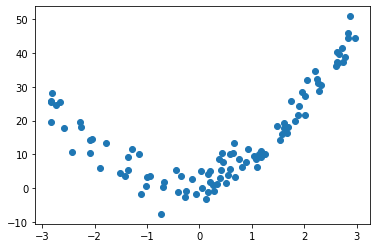

In [45]:
plt.scatter(x,y)
plt.show()

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(70, 1) (70, 1) (30, 1) (30, 1)


In [47]:
#SCENARIO 2: Regularization either makes no difference or actually hurts the model
num_degrees = 4
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[2.96935272] [ 2.96935272  8.81705557 26.18094792 77.7404689 ]
(100, 1) (100, 4)


[1.70000641] [[ 2.9816642   4.63482225  0.04535842 -0.05712245]]
Mean Squared Error on Test:  16.39805054021922


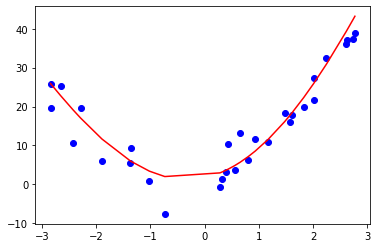

In [48]:
#Regression model with polynomial features without regularization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

Mean Squared Error on Test:  23.28973842622771
[3.85253918] [0.20814417 2.78232506 0.45276106 0.15167899]


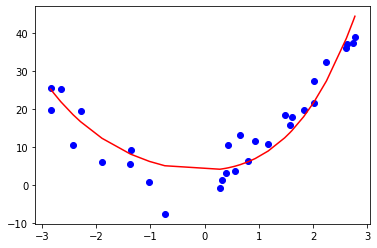

In [49]:
#regression model with polynomial features with regularization
lasso_reg = Lasso(alpha=1.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

plt.plot(xs,y_predict,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

**From the above scenario, we can see that the Regularization did not benefit the base model.**

- The polynomial model with number of degrees as 4 performs better than the regularisation model with alpha of lasso set to 1.5 . 
- The MSE of polynomial function is lesser than the MSE obtained after lasso regression.
- We can say that regularisation did not help or benefit the base model.

In [53]:
#SCENARIO 1: Regularization helps the model
num_degrees = 20
poly_features = PolynomialFeatures(degree=num_degrees, include_bias=False)
x_poly = poly_features.fit_transform(x)
print(x[0], x_poly[0])
print(x.shape, x_poly.shape)

[2.96935272] [2.96935272e+00 8.81705557e+00 2.61809479e+01 7.77404689e+01
 2.30838873e+02 6.85442034e+02 2.03531917e+03 6.04358050e+03
 1.79455222e+04 5.32865851e+04 1.58226666e+05 4.69830782e+05
 1.39509331e+06 4.14252412e+06 1.23006152e+07 3.65248653e+07
 1.08455208e+08 3.22041767e+08 9.56255597e+08 2.83946016e+09]
(100, 1) (100, 20)


[1.15885572] [[-2.33309547e-01  1.59704995e+01  9.25428986e+01 -7.57469719e+01
  -2.52123638e+02  1.58113113e+02  2.76982608e+02 -1.52209151e+02
  -1.60091705e+02  8.04116784e+01  5.39393778e+01 -2.52837528e+01
  -1.09586875e+01  4.86065957e+00  1.32082626e+00 -5.60331228e-01
  -8.68376317e-02  3.55424398e-02  2.39541994e-03 -9.52616533e-04]]
Mean Squared Error on Test:  469.4922699240659


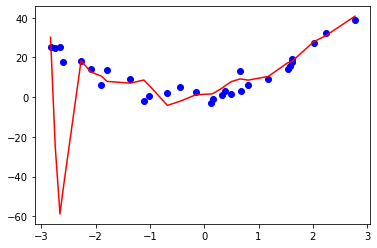

In [54]:
#Regression model with polynomial features without regularization
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test,y_predict)
print("Mean Squared Error on Test: ", mse)

order = x_test[:,0].argsort()
x_test = x_test[order]
ys = y_predict[order]
truey = y_test[order]
xs = x_test[:,:-(num_degrees-1)]

plt.plot(xs,ys,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

Mean Squared Error on Test:  11.486559810624048
[3.67024615] [ 1.15286679e+00  1.64278362e+00  8.34539355e-01  8.68649322e-01
  0.00000000e+00 -8.56311622e-02 -1.57111245e-02 -4.56242970e-03
  8.58939732e-05  2.44394606e-04  4.66332963e-05  5.52487537e-05
  4.73995154e-06  5.20345937e-06  3.40123767e-07  2.35581140e-07
  1.00001280e-08 -2.52074682e-08 -1.96326151e-09 -9.07913141e-09]


/Users/krishnajyesta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 598.9241527242414, tolerance: 1.4560407504380168
  model = cd_fast.enet_coordinate_descent(


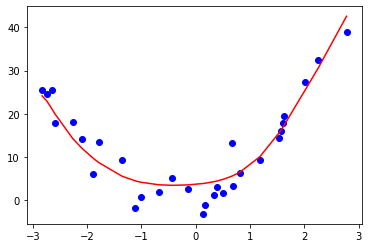

In [55]:
#regression model with polynomial features with regularization
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
y_predict = lasso_reg.predict(x_test)
mse = mean_squared_error(truey,y_predict)
print("Mean Squared Error on Test: ", mse)
print(lasso_reg.intercept_, lasso_reg.coef_)

plt.plot(xs,y_predict,"r-")
plt.scatter(xs, truey, color='blue')
plt.show()

**From the above scenario, we can see that the Regularization benefits the base model.**

- The polynomial model with number of degrees as 20 did not perform well compared to regularised model with alpha of lasso set to 0.5 . 
- The MSE of lasso regression model is far lesser than the MSE obtained from model without regularisation.
- We can say that in such cases, regularisation did better than the base model withou regularisation. 